---
# The Perceptron Learning Algorithm
## Iris Species Binary Classification 

In this notebook we implement the *perceptron learning algorithm* for binary species classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 

## What is the Perceptron?

---

The Perceptron is one of the simplest artificial neural network algorithms. It is used for supervised learning of binary clusters and involves giving inputs with documented outputs. The main concept behind the Perceptron is like the neuron of a nervous system, where each neuron receives thousands of signals from other neurons connected via synapses. In this case, the Perceptron represents one neuron, and the synapses are represented by the weights and biases.

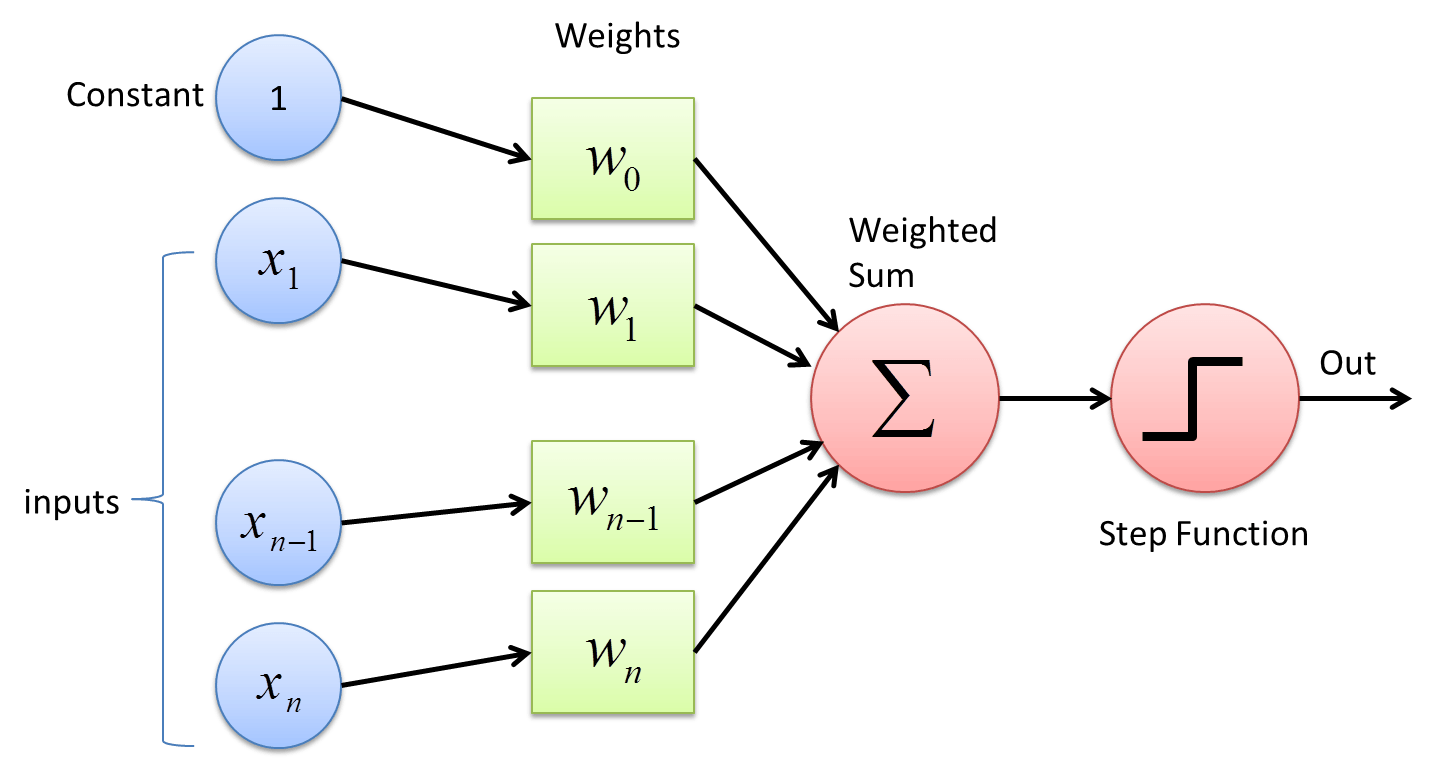

---

The outputs of a fully connected layer are defined as:

$ h_{W,b}(X) = \phi(XW + b) $

Where;
* **X** represents the matrix of input features
* **W** is the weighted matrix that contains all the connection weights except for the bias
* **b** is the bias vector containing all the connection weights between the bias neuron and the artificial neurons.
* The function **$\phi$** is called the *activation function*

---

## Perceptron Learning Rule

A perceptron trains and updates with a learning rule that reinforces connections that help reduce error. The Perceptron is fed one training instance at a time and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. The formula for the Perceptron Learning Rule is below:

$w_{i, j}^{\text{next step}} = w_{i, j} + \eta(y_{i} - \hat{y}_{j})x_{i}$

---

### Task
Our task will be to classify setosa and versicolor species using two feature measures, such as sepal length and sepal width. To do this, we will need the following libraries:

* [matplotlib](https://matplotlib.org)
* [pandas](https://pandas.pydata.org)
* [numpy](https://numpy.org/)
* [sklearn](https://scikit-learn.org/stable/)



---


In [1]:
# import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import datasets from sklearn which contains the iris data
from sklearn import datasets

# load the iris data (specifying type as data frames)
iris = datasets.load_iris(as_frame=True)

In [6]:
df = iris.frame

---

In the following code cell we extract our data to numpy arrays.

---

In [13]:
df = iris.frame
df = df.iloc[:100]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [16]:
df_classify = df[["sepal length (cm)", "sepal width (cm)", "target"]]
df_classify["ones"] = np.ones(100)

<ipython-input-16-ade4883369f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classify["ones"] = np.ones(100)


In [18]:
for i in range(100):
    if df_classify["target"].iloc[i] == 0:
        df_classify["target"].iloc[i] = 1.0
    else:
        df_classify["target"].iloc[i] = -1.0

/Users/randydavila/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/randydavila/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [20]:
X = df_classify[["sepal length (cm)", "sepal width (cm)", "ones"]].to_numpy()
y = df_classify["target"].to_numpy()

In [22]:
X[0]

array([5.1, 3.5, 1. ])

----
### Visualization of Data

It is important to visualize our data before we implement our model to understand what is happening along the way.

---

Text(0.5, 1.0, 'Iris Data Plot')

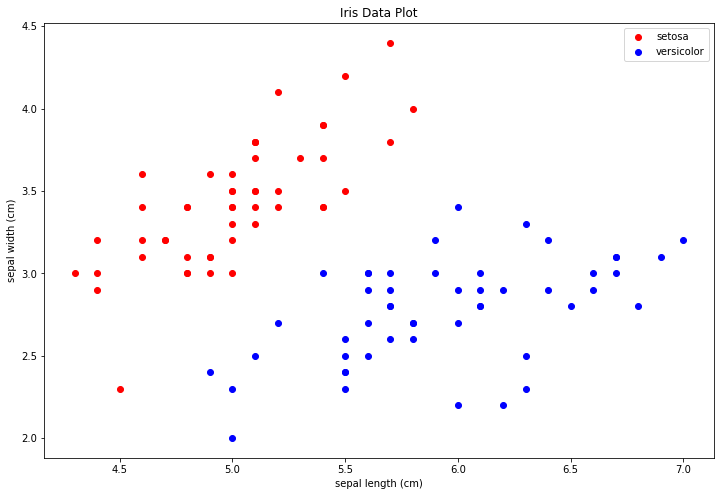

In [23]:
plt.figure(figsize = (12, 8))

plt.scatter(X[:50, 0],
            X[:50, 1], 
            label = 'setosa', 
            color = 'r')

plt.scatter(X[50:, 0], 
            X[50:, 1], 
            label = 'versicolor', 
            color = 'blue')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.title("Iris Data Plot")

---

We now need our activation function, the sign function, so we define this function in the following code cell. This is defined as:

\begin{equation}
  \text{sgn} x :=\left\{
  \begin{array}{@{}ll@{}}
    -1, & \text{if}\ x < 0 \\
     1, & \text{if}\ x > 0
  \end{array}\right.
\end{equation}

---

In [25]:
def sign(x, y):
    # the input vectors here should be numpy arrays
    if x @ y > 0:
        return 1.0
    else:
        return -1.0
    
def L(w, features = X, labels = y):
    return sum(.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))

In [26]:
w = np.random.rand(3)
print(L(w))

100.0


## Gradient Descent

---

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The basic idea behind Gradient Descent is to iteratively tweak parameters to minimize a cost function. It measures the local gradient of the error function with regard to the parameter vector $\theta$ and goes in the direction of the descending gradient. Once the gradient is zero, we have reached a minimum.

---

### Cost Function

We initalize Gradient Descent by filling $\theta$ with random values. We improve it gradually by taking one step at a time, each step attempting to decrease the *cost function* until the algorithm converges to a minimum. In our case we will be using the Mean Squared Error, or MSE for implementation. The MSE equation is shown below:

$ MSE = \frac{1}{n} \sum_{i = 1}^{n}(Y_{i} - \hat{Y}_{i})^{2}$

---

### Learning Rate

---
An important parameter in the Gradient Descent algorithm is the step size, which is determined by the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm will have to complete many iterations to converge to a minimum and will negatively impact performance. Conversely, if the learning rate is too high, we might jump across the 'valley' of the equation and end up on the other side. This would cause the algorithm to diverge with larger and larger values; ultimately it would fail to find an optimal solution.

---

### Implementing Gradient Descent

---

To begin we need to compute the gradient of the cost function about each model parameter $\theta_{j}$ (e.g., we calculate how much the cost function will change if you change $\theta_{j}$ incrementally). We compute this by taking the partial derivative of the cost function. This equation is shown below:

$\frac{\partial}{\partial\theta_{j}}$ MSE($\theta) = \frac{2}{m} \sum_{i = 1}^{m}(\theta^{T}x^{(i)} - y^{(i)})x_{j}^{(i)} $

---

### Stochastic Gradient Descent

---

Stochastic gradient descent picks a random instance in the training set at every step and computes the gradients based on *only* that instance. This means that the algorithm is much faster, which is important in the implementation of a perceptron. The equation can be seen below:

$\theta = \theta - \eta\cdot\nabla_{\theta}J(\theta;x^{(i)};y^{(i)})$

---

---

### Gradient Descent Step

Once we have the gradient vector, we move in the opposite direction to go downhill. This means we subtract $\nabla$MSE($\theta$) from $\theta$; this is where we implement the learning rate $\eta$ by multiplying the gradient vector by $\eta$ to determine the size of the next step. The equation is below:

$\theta^{\text{next step}} = \theta - \eta\nabla_{\theta}\text{MSE}(\theta)$

---

We will now implement our basic Batch Gradient Descent example. We begin by importing the necessary libraries.

---


In [28]:
def grad_approx(w, x, y):
    return (sign(w,x) - y)*x

# set epochs
epochs = 5000

# set alpha
alpha = .5

The Loss before implementing stochastic approx gradient descent = 100.0
The Loss after implementing stochastic approx gradient descent = 2.0


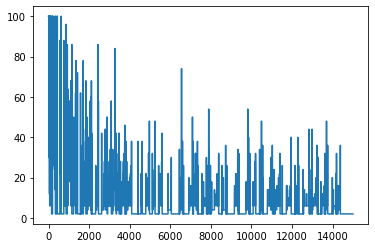

In [37]:
w = np.random.rand(3)
print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")
losses = []
for epoch in range(epochs+10000):
    random_index = np.random.randint(100)
    w = w - alpha*grad_approx(w, X[random_index], y[random_index])
    losses.append(L(w))
print(f"The Loss after implementing stochastic approx gradient descent = {L(w)}")
plt.plot(losses)

The Loss before implementing stochastic approx gradient descent = 100.0
The Loss after implementing stochastic approx gradient descent = 0.0


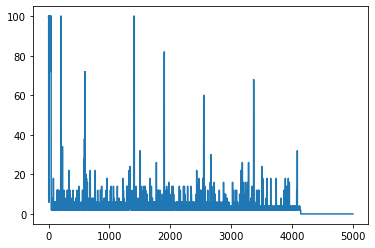

In [38]:
w = np.random.rand(3)
print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")
losses = []
batch_size = 30
for epoch in range(epochs):
    batch_grad = np.zeros(3)
    for _ in range(batch_size):
        random_index = np.random.randint(100)
        batch_grad += grad_approx(w, X[random_index], y[random_index]) 
    w = w - alpha*batch_grad
    losses.append(L(w))
print(f"The Loss after implementing stochastic approx gradient descent = {L(w)}")
plt.plot(losses)

In [39]:
def full_grad_approx(w, features=X, labels=y):
    return sum((sign(w,x) - labels[i])*x for i, x in enumerate(features))

The Loss before implementing stochastic approx gradient descent = 100.0
The Loss after implementing stochastic approx gradient descent = 0.0


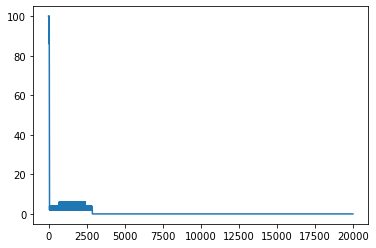

In [47]:
w = np.random.rand(3)
print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")
losses = []
for epoch in range(20000):
    w = w - alpha*full_grad_approx(w)
    losses.append(L(w))
print(f"The Loss after implementing stochastic approx gradient descent = {L(w)}")
plt.plot(losses)

In [48]:
w

array([-459.23259375,  589.94295177,  709.7721511 ])

----

We have defined a hyperplane in 3-dimentional space by 

$
z = w_0*x_1 + w_1*x_2 + w_2
$

Setting $z = 0$, and solving for $x_2$, we have 

$
x_2 = \frac{w_0x_1 + w_2}{-w_1}
$

----

Text(0.5, 1.0, 'Iris Data Plot')

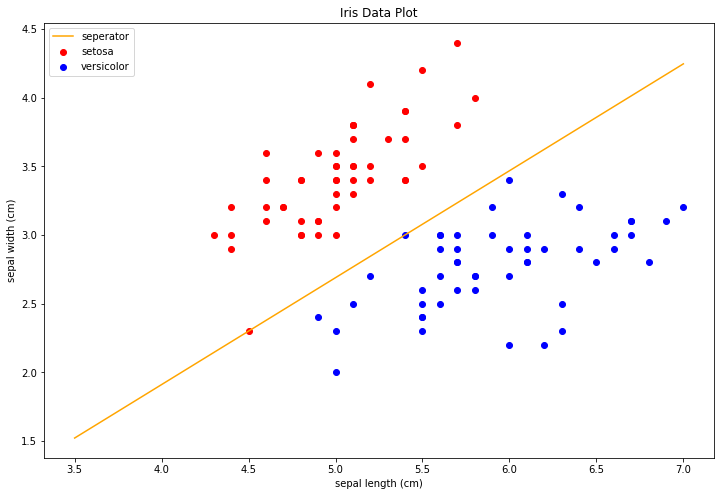

In [50]:
domain = np.arange(3.5, 7.5, .5)
line = [(w[0]*x + w[2])/-w[1] for x in domain]


plt.figure(figsize = (12, 8))

plt.scatter(X[:50, 0],
            X[:50, 1], 
            label = 'setosa', 
            color = 'r')

plt.scatter(X[50:, 0], 
            X[50:, 1], 
            label = 'versicolor', 
            color = 'blue')

plt.plot(domain, 
         line, 
         label = 'seperator', 
         color='orange')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.title("Iris Data Plot")